**Leng Her**

**Lab 7**

**October 23 2022**

#Overview

In order to understand where wines originated from which of three regions, we will be utilizing different ensemble methods and classifiers. We will be using bagging,boosting,random forest, KNeighbors, and stacking classifier methods for differentiating the three regions of where the wines originated. Bagging, boosting and random forest are ensemble methods, a machine learning technique that consists of serveral base model that produces one predictive model (Lutins, E). Stacking is also an ensemble technique where predictions form multiple classifiers are used for new features to train a meta classifier (Ceballos, F). By using these ensemble models and methods we will attempt to predict which of the three regions the wines were originated.

References: 

https://medium.com/@saugata.paul1010/ensemble-learning-bagging-boosting-stacking-and-cascading-classifiers-in-machine-learning-9c66cb271674

https://towardsdatascience.com/ensemble-methods-in-machine-learning-what-are-they-and-why-use-them-68ec3f9fef5f

https://towardsdatascience.com/stacking-classifiers-for-higher-predictive-performance-566f963e4840

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html




#Data


The dataset below was obtained from one fo sklearns dataset. The origins of the dataset is from UCI ML. For more information on the data set please refer to the link: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html


In [ ]:
import six

In [ ]:
from sklearn.datasets import load_wine
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import model_selection
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from mlxtend.classifier import StackingClassifier
from mlxtend.classifier import StackingCVClassifier
from mlxtend.classifier import EnsembleVoteClassifier

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

In [ ]:
wine = load_wine()
# Convert to Pandas Dataframe
wine_dataframe = pd.DataFrame(data = np.c_[wine['data'], wine['target']], 
                             columns = wine['feature_names'] + ['target'])
print(wine.DESCR)


.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [ ]:
wine_dataframe.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


#EDA (Exploratory Data Analysis)

In [ ]:
wine_dataframe.round(4).describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [ ]:
wine_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

Check for null values. No Null values

In [ ]:
print(f"The number of columns in the dataset is: {wine_dataframe.shape[1]}")
print(f"The number of rows in the dataset is: {wine_dataframe.shape[0]}")

The number of columns in the dataset is: 14
The number of rows in the dataset is: 178


In [ ]:
wine_dataframe['target']

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
173    2.0
174    2.0
175    2.0
176    2.0
177    2.0
Name: target, Length: 178, dtype: float64

In [ ]:
class1 = len(wine_dataframe[wine_dataframe['target']== 0.0])
class2 = len(wine_dataframe[wine_dataframe['target']== 1.0])
class3 = len(wine_dataframe[wine_dataframe['target']== 2.0])

print("Class 1 Occurances: " + str(class1))
print("Class 2 Occurances: " + str(class2))
print("Class 3 Occurances: " + str(class3))


Class 1 Occurances: 59
Class 2 Occurances: 71
Class 3 Occurances: 48


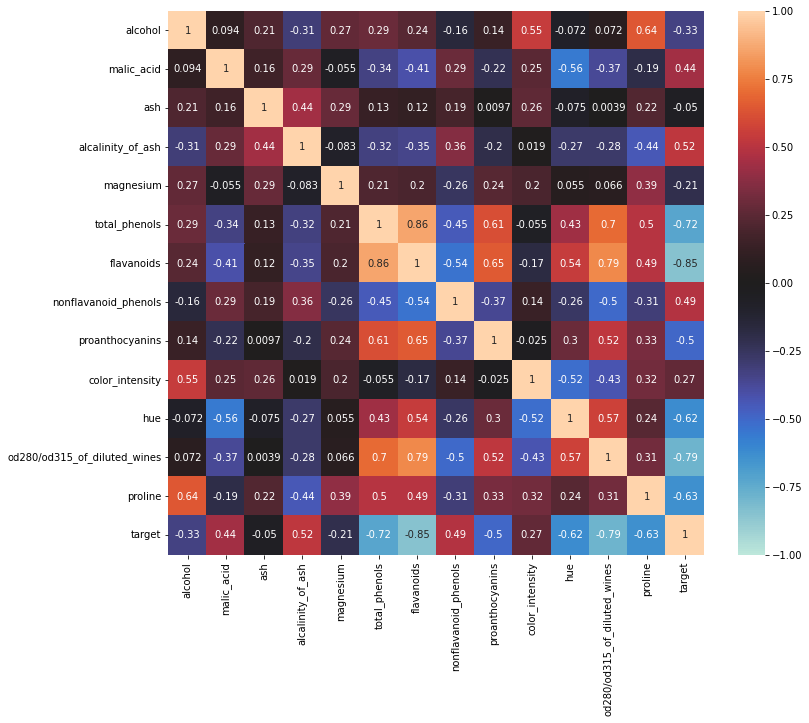

In [ ]:
fig, ax = plt.subplots(figsize = (12,10))

corrmat = wine_dataframe.corr()
sns.heatmap(corrmat,-1,1,ax=ax, center = 0, annot = True)

From the correlation matrix, we can observe that proline and alcohol have a moderately strong postitive correlation along with proline and total_phenols; diluted wines has a moderately strong positive correlation with total_phenols, flavnoids, proanthocyanins and hue.

The strongest positive correlation between features is flavnoids and total_phenols with a correlation of 0.86.

In [ ]:
plt.close(); #code from: https://medium.com/@saugata.paul1010/ensemble-learning-bagging-boosting-stacking-and-cascading-classifiers-in-machine-learning-9c66cb271674
sns.set_style("whitegrid");
sns.pairplot(wine_dataframe, hue="target", size=3);
plt.show()

Output hidden; open in https://colab.research.google.com to view.

From the above plots we can see that proline is the best seperator of class 1 compared to the other features. A close second to proline is the dilluted wines feature for class 1. In addiotion, both hue and dilluted wines feature show promise in seperating class 3 from the other two classes. All other features based on the plots do not seperate the three classes as accurately.

#Models


In [ ]:
# Code Taken From 
# https://medium.com/@saugata.paul1010/ensemble-learning-bagging-boosting-stacking-and-cascading-classifiers-in-machine-learning-9c66cb271674

#baseline models

X = wine_dataframe.drop("target", 1)
y = wine_dataframe.target

RANDOM_SEED = 550

#Base Learners
rf_clf = RandomForestClassifier(n_estimators=10, random_state=RANDOM_SEED)
knn_clf = KNeighborsClassifier(n_neighbors=2)
svc_clf = SVC(C=10000.0, kernel='rbf', random_state=RANDOM_SEED)
lr_clf = LogisticRegression(C=20000, penalty='l2', random_state=RANDOM_SEED)

classifier_array = [rf_clf, knn_clf, svc_clf, lr_clf]
labels = [clf.__class__.__name__ for clf in classifier_array]

normal_accuracy = []
normal_std = []
bagging_accuracy = []
bagging_std = []


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [ ]:
for clf in classifier_array:
    cv_scores = cross_val_score(clf, X, y, cv=3, n_jobs=-1)
    
    normal_accuracy.append(np.round(cv_scores.mean(),4))
    normal_std.append(np.round(cv_scores.std(),4))
    
    print("Accuracy: %0.4f (+/- %0.4f) [Normal %s]" % (cv_scores.mean(), cv_scores.std(), clf.__class__.__name__))


Accuracy: 0.9161 (+/- 0.0543) [Normal RandomForestClassifier]
Accuracy: 0.6465 (+/- 0.0662) [Normal KNeighborsClassifier]
Accuracy: 0.9273 (+/- 0.0476) [Normal SVC]
Accuracy: 0.9108 (+/- 0.0925) [Normal LogisticRegression]


>From our baseline models we can see that the most accurate model is the SVC model and following it is, the normal logistic regression model. The worse performing model would be the KNN model with only a ~65% accuracy, which could be due to only observering 2 nearest neighbors.

In [ ]:
for clf in classifier_array:
    cv_scores = cross_val_score(clf, X, y, cv=3, n_jobs=-1)
    bagging_clf = BaggingClassifier(clf, max_samples=0.4, max_features=3, random_state=RANDOM_SEED)
    bagging_scores = cross_val_score(bagging_clf, X, y, cv=3, n_jobs=-1)

    bagging_accuracy.append(np.round(bagging_scores.mean(),4))
    bagging_std.append(np.round(bagging_scores.std(),4))
    print("Accuracy: %0.4f (+/- %0.4f) [Bagging %s]\n" % (bagging_scores.mean(), bagging_scores.std(), clf.__class__.__name__))


Accuracy: 0.9158 (+/- 0.0236) [Bagging RandomForestClassifier]

Accuracy: 0.8990 (+/- 0.0363) [Bagging KNeighborsClassifier]

Accuracy: 0.8933 (+/- 0.0421) [Bagging SVC]

Accuracy: 0.9160 (+/- 0.0356) [Bagging LogisticRegression]



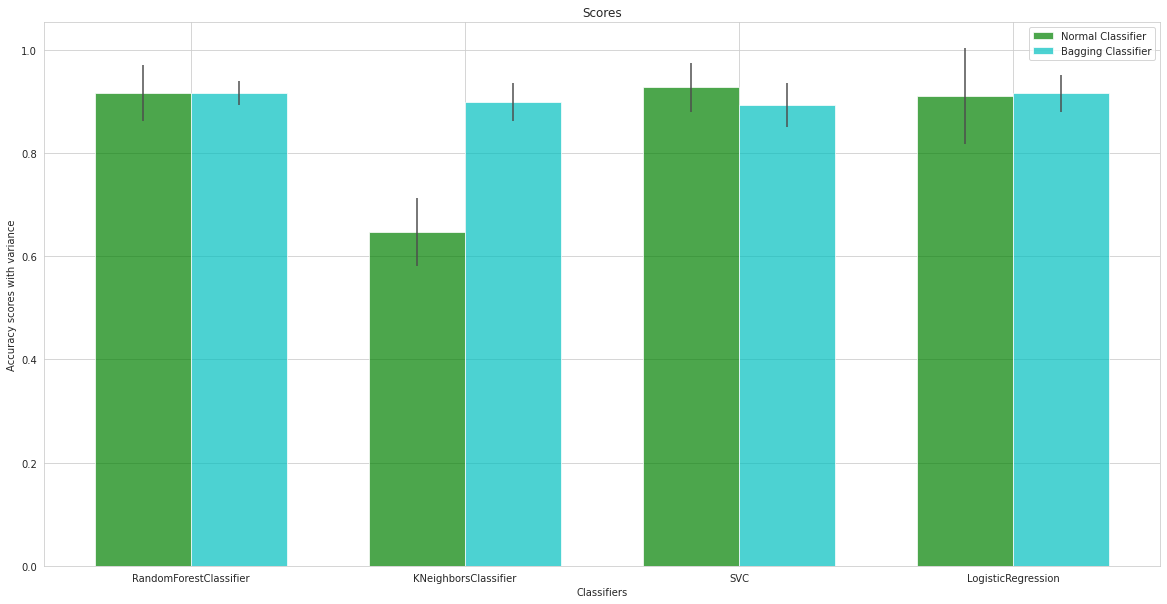

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
n_groups = 4
index = np.arange(n_groups)
bar_width = 0.35
opacity = .7
error_config = {'ecolor': '0.3'}
normal_clf = ax.bar(index, normal_accuracy, bar_width, alpha=opacity, color='g', yerr=normal_std, error_kw=error_config, label='Normal Classifier')
bagging_clf = ax.bar(index + bar_width, bagging_accuracy, bar_width, alpha=opacity, color='c', yerr=bagging_std, error_kw=error_config, label='Bagging Classifier')
ax.set_xlabel('Classifiers')
ax.set_ylabel('Accuracy scores with variance')
ax.set_title('Scores')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels((labels))
ax.legend()

From the bar graph we can observe that bagging had little affect on our normal accuracy scores except for the KNeighbors Classifier with a dramatic increase in accuracy. Each classifier did increase by a little except for one, the SVC score actually decreased from the bagging medthod.

In [ ]:
boosting_acc = []
boosting_std = []
ada_boost = AdaBoostClassifier(n_estimators=5)
grad_boost = GradientBoostingClassifier(n_estimators=10)
xgb_boost = XGBClassifier(max_depth=5, learning_rate=0.001)
ensemble_clf = EnsembleVoteClassifier(clfs=[ada_boost, grad_boost, xgb_boost], voting='hard')
boosting_labels = ['Ada Boost', 'Gradient Boost', 'XG Boost', 'Ensemble']
for clf, label in zip([ada_boost, grad_boost, xgb_boost, ensemble_clf], boosting_labels):  
    scores = cross_val_score(clf, X, y, cv=3, scoring='accuracy')
    boosting_acc.append(np.round(scores.mean(),4))
    boosting_std.append(np.round(scores.std(),4))
    print("Accuracy: {0:.3f}, Variance: (+/-) {1:.3f} [{2}]".format(scores.mean(), scores.std(), label))

Accuracy: 0.843, Variance: (+/-) 0.035 [Ada Boost]
Accuracy: 0.853, Variance: (+/-) 0.070 [Gradient Boost]
Accuracy: 0.871, Variance: (+/-) 0.070 [XG Boost]
Accuracy: 0.876, Variance: (+/-) 0.056 [Ensemble]


From the accuracy scores we can see that boosting showed a decrease in accuracy compared to our normal tests scores. The best accuracy score out of the boosting methods was the Ensemble method with the worst accuracy score from the tested methods being ADA boost.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  
/usr/local/lib/python3.7/dist-packages/mlx

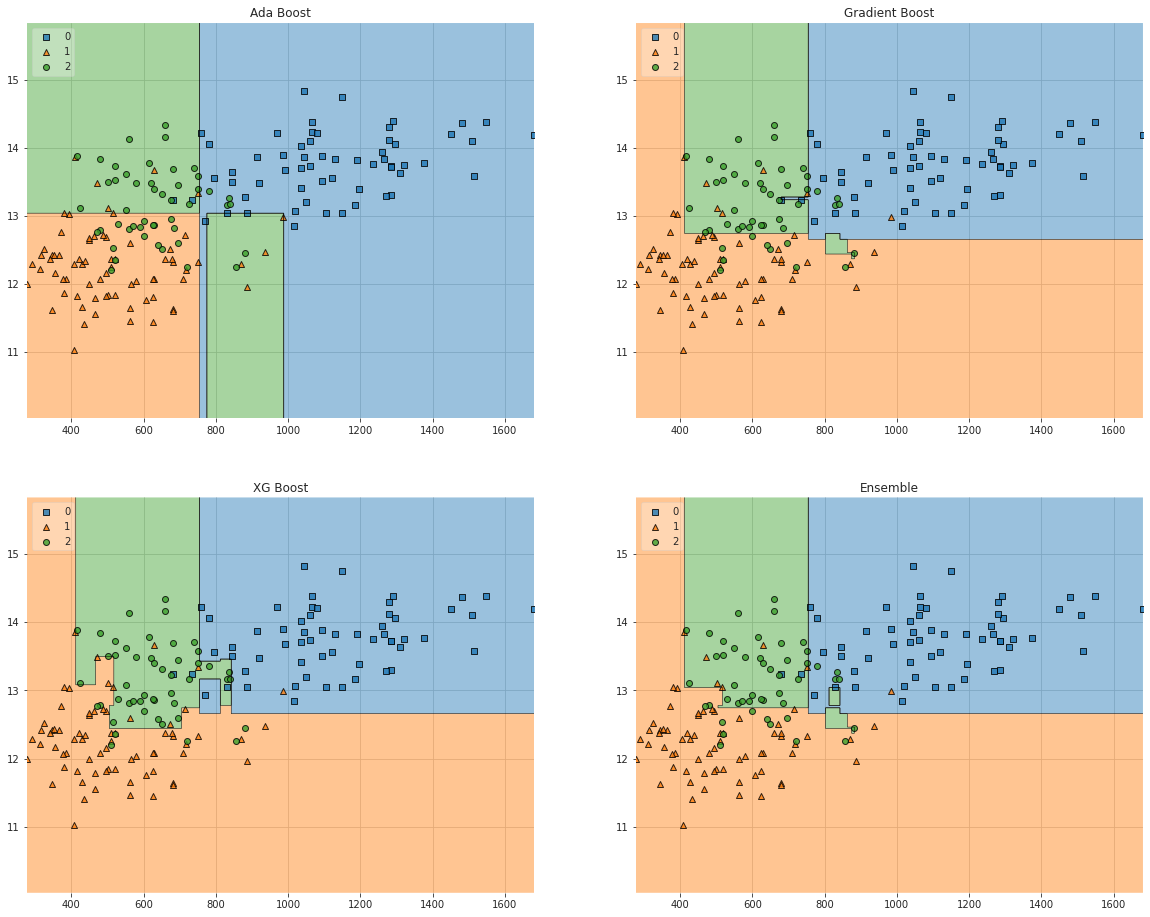

In [ ]:
#Decision Regions for all the boosting algorithms.
proline = wine_dataframe[['proline','alcohol']]
X = np.array(proline)
y = np.array(y)
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(20,16))
for clf, label, grd in zip([ada_boost, grad_boost, xgb_boost, ensemble_clf], boosting_labels, itertools.product([0, 1], repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y.astype(np.integer), clf=clf, legend=2)
    plt.title(label)
plt.show()

From the plotted decision regions we used proline and alcohol features as the more important features based on the plotted pair plots above. From the decison region plot above we can observe that each boosting method does a decent job out classifying each region based on the target variable. The best decision region plot would be between Ensemble, XG boost and Gradient Boost.

In [46]:
RANDOM_SEED = 0
X = wine_dataframe.drop("target", 1)
y = wine_dataframe.target


#Base Learners
rf_clf = RandomForestClassifier(n_estimators=10, random_state=RANDOM_SEED)
knn_clf = KNeighborsClassifier(n_neighbors=2)
svc_clf = SVC(C=10000.0, kernel='rbf', random_state=RANDOM_SEED)
lr_clf = LogisticRegression(C=20000, penalty='l2', random_state=RANDOM_SEED)
lr = LogisticRegression(random_state=RANDOM_SEED) # meta classifier

sclf = StackingClassifier(classifiers=[rf_clf, knn_clf, svc_clf,lr_clf], meta_classifier=lr)

classifier_array = [rf_clf, knn_clf, svc_clf, lr_clf, sclf]
labels = [clf.__class__.__name__ for clf in classifier_array]
acc_list = []
var_list = []
for clf, label in zip(classifier_array, labels):
    cv_scores = model_selection.cross_val_score(clf, X, y, cv=3, scoring='accuracy')
    print("Accuracy: %0.4f (+/- %0.4f) [%s]" % (cv_scores.mean(), cv_scores.std(), label))
    acc_list.append(np.round(cv_scores.mean(),4))
    var_list.append(np.round(cv_scores.std(),4))
    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit

Accuracy: 0.9046 (+/- 0.0442) [RandomForestClassifier]
Accuracy: 0.6465 (+/- 0.0662) [KNeighborsClassifier]
Accuracy: 0.9273 (+/- 0.0476) [SVC]
Accuracy: 0.9108 (+/- 0.0925) [LogisticRegression]
Accuracy: 0.9161 (+/- 0.0543) [StackingClassifier]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


NOTE: Results printed again for readability

In [49]:
print("Accuracy: 0.9046 (+/- 0.0442) [RandomForestClassifier]")
print("Accuracy: 0.6465 (+/- 0.0662) [KNeighborsClassifier]")
print("Accuracy: 0.9273 (+/- 0.0476) [SVC]")
print("Accuracy: 0.9108 (+/- 0.0925) [LogisticRegression]")
print("Accuracy: 0.9161 (+/- 0.0543) [StackingClassifier]")

Accuracy: 0.9046 (+/- 0.0442) [RandomForestClassifier]
Accuracy: 0.6465 (+/- 0.0662) [KNeighborsClassifier]
Accuracy: 0.9273 (+/- 0.0476) [SVC]
Accuracy: 0.9108 (+/- 0.0925) [LogisticRegression]
Accuracy: 0.9161 (+/- 0.0543) [StackingClassifier]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.in

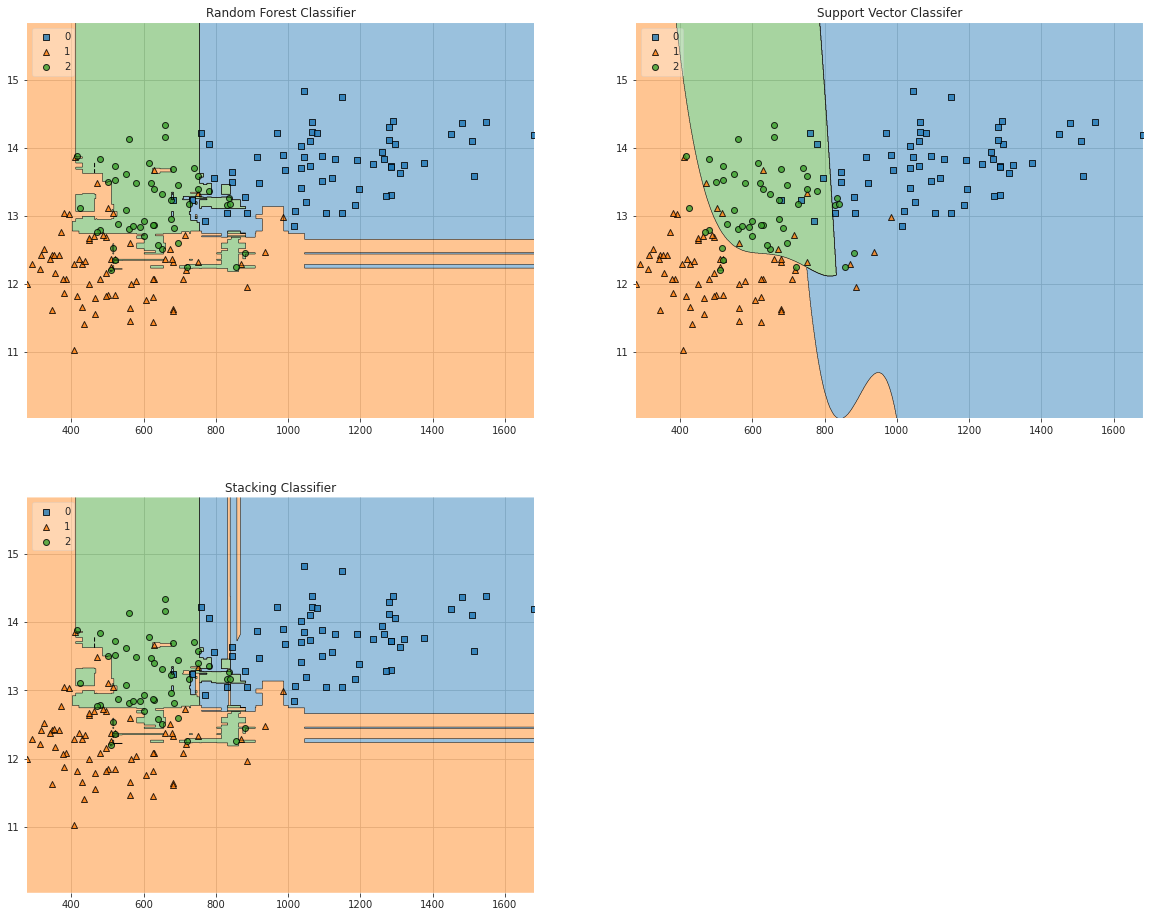

In [51]:
#Decision Regions for 3 algorithms.
proline = wine_dataframe[['proline','alcohol']]
X = np.array(proline)
y = np.array(y)
gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(20,16))
for clf, label, grd in zip([rf_clf, svc_clf, sclf], ["Random Forest Classifier", "Support Vector Classifer", "Stacking Classifier"], itertools.product([0, 1], repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y.astype(np.integer), clf=clf, legend=2)
    plt.title(label)
plt.show()

From the above decision region plot we can obeserve that SVC excels at differentiating regions while the stacking and random forest classifier excel at accuracy of regions. The stacking plot seems to focus on specificity while the SVC plot focuses on a generalization of the majority. 

#stuff

In [52]:
#Stacking classifiers using Grid Search cross-validation

RANDOM_SEED = 789
X = wine_dataframe.drop("target", 1)
y = wine_dataframe.target

rf_clf = RandomForestClassifier(random_state=RANDOM_SEED,n_jobs=-1)

knn_clf = KNeighborsClassifier(p=2, metric='minkowski',n_jobs=-1)

lr = LogisticRegression(random_state=RANDOM_SEED) # meta classifier

sclf = StackingClassifier(classifiers=[rf_clf, knn_clf], meta_classifier=lr)

print("\nAccuracies of all classifiers using grid search cross validation.")
params = {'randomforestclassifier__n_estimators': np.arange(10,20), 'randomforestclassifier__max_depth': np.arange(1,5), 
          'kneighborsclassifier__n_neighbors': np.arange(1,20,2),
          'meta-logisticregression__C': [0.001,0.01,0.1,1,10,100,1000]}




Accuracies of all classifiers using grid search cross validation.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


In [53]:
gsearch_cv = GridSearchCV(estimator=sclf, param_grid=params, cv=5, refit=True)
gsearch_cv.fit(X, y)
cv_keys = ('mean_test_score', 'std_test_score', 'params')
print('Best parameters: %s' % gsearch_cv.best_params_)
print('Accuracy: %.2f' % gsearch_cv.best_score_)

Best parameters: {'kneighborsclassifier__n_neighbors': 3, 'meta-logisticregression__C': 10, 'randomforestclassifier__max_depth': 4, 'randomforestclassifier__n_estimators': 10}
Accuracy: 0.98


After performing stacking classifiers using grid Search cross-validation, we can observe that the accuracy has gone up drastically being of 0.98. Compared to our other methods this is the most accurate model we have.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  app.launch_new_ins

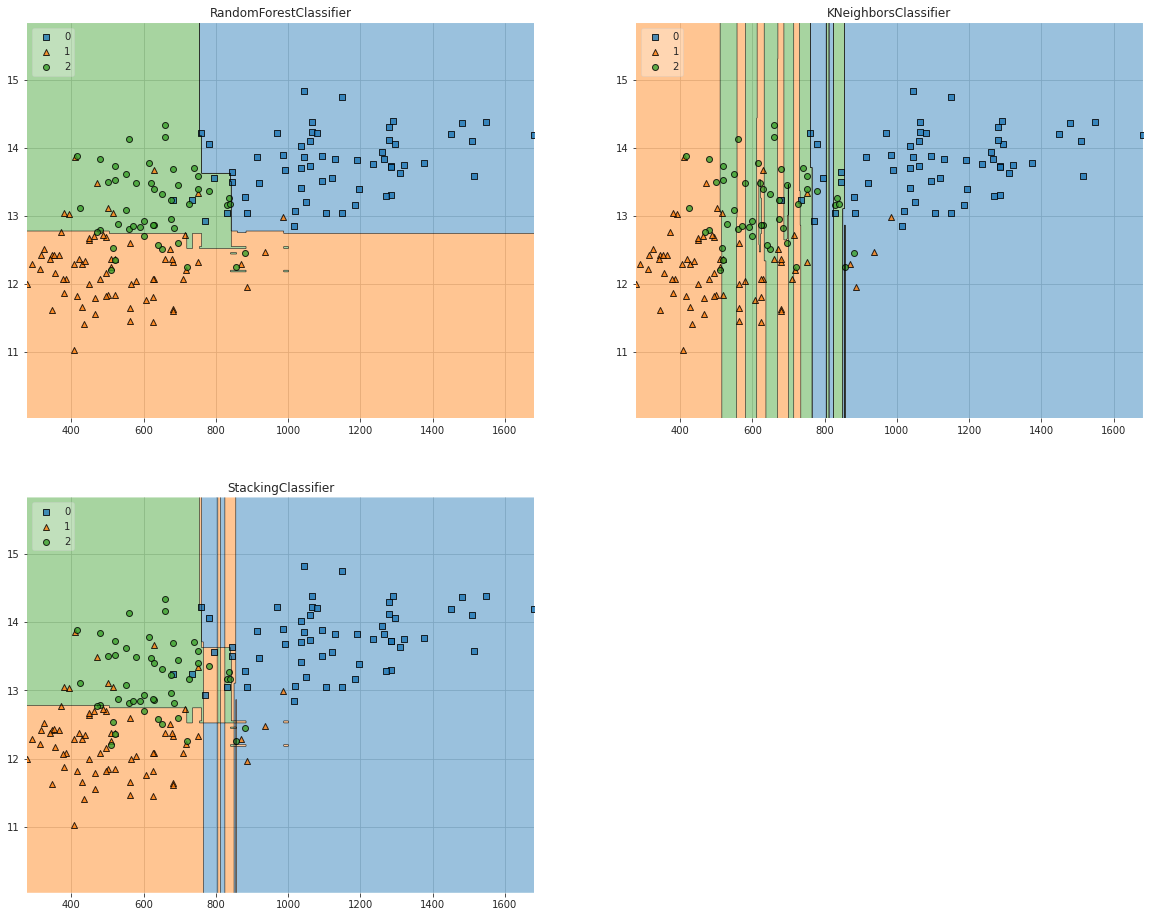

In [55]:
proline = wine_dataframe[['proline','alcohol']]
X = np.array(proline)
y = np.array(y)

rf_clf = RandomForestClassifier(max_depth=3,n_estimators=15,random_state=RANDOM_SEED,n_jobs=-1)
knn_clf = KNeighborsClassifier(n_neighbors=7,p=2, metric='minkowski',n_jobs=-1)
lr = LogisticRegression(C=0.1,random_state=RANDOM_SEED) # meta classifier
sclf = StackingClassifier(classifiers=[rf_clf, knn_clf], meta_classifier=lr)

gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(20,16))

for clf, label, grd in zip([rf_clf, knn_clf, sclf], ["RandomForestClassifier", "KNeighborsClassifier", "StackingClassifier"], itertools.product([0, 1], repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y.astype(np.integer), clf=clf, legend=2)
    plt.title(label)

plt.show()

From the plots we can observe how accurate our models are with randomforest and stacking classifier being quite accurate. From the plot we can obeserve that the KNeighbors classifier seems to differ from the other two when differentiating regions properly. Although the stacking classifier make be more accurate than the random forest classifier, the random forest classifier has a cleaner look in differentiating regions.

#Conclusion

Overall, in this lab we used ensemble methods to determine where of the three regions did the wines given originate from. From our data we can observe that there is a strong relationship between two features in predicting which region each wine is from. These features being proline and alcohol. Continuing on, by using ensemble methods we were able to predict where wine was from within ~80-92% accuracy. However, after utilizing stacking and cross-grid validation we were able to create a model with 98% accuracy in determining where each wine was from. The least accurate overall was the KNeighbors model, however this could be due to only observing two N nearest neighbor which lead to the inaccuracy. Overall, because we were able to use stacking and cross-grid validation along with ensemble methods, we could predict where wines originated from based on the model that was created with a 98% accuracy score.

References:

1. Lutins, E. (2017, August 2). Ensemble Methods in Machine Learning: What are they and why use them? Medium. Retrieved October 24, 2022, from https://towardsdatascience.com/ensemble-methods-in-machine-learning-what-are-they-and-why-use-them-68ec3f9fef5f

2. Ceballos, F. (2019, September 14). Stacking classifiers for higher predictive performance. Medium. Retrieved October 24, 2022, from https://towardsdatascience.com/stacking-classifiers-for-higher-predictive-performance-566f963e4840 


